In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['axes.unicode_minus'] = False

In [12]:
import pandas as pd
import numpy as np
df = pd.read_excel('owid-covid-data.xlsx', usecols='C:E')
df.rename(columns={'location':'국가','date':'일자', 'total_cases':'확진자'}, inplace=True)
df = df.fillna(0)
df['일자'] = pd.to_datetime(df['일자'])
df['일자'] = df['일자'].dt.strftime('%y.%m.%d')
df = df[df['일자'] == '22.08.25']
df['확진자'] = df['확진자'].astype(int)
df

,국가,일자,확진자
913,Afghanistan,22.08.25,191967
1838,Africa,22.08.25,12317586
2751,Albania,22.08.25,327607
3664,Algeria,22.08.25,270097
4571,Andorra,22.08.25,46027
...,...,...,...
207769,Wallis and Futuna,22.08.25,761
208717,World,22.08.25,599298126
209585,Yemen,22.08.25,11922
210476,Zambia,22.08.25,332710


In [13]:
continents = ['Africa', 'Asia', 'Europe', 'European Union', 'High income', 'Upper middle income', 'Low income', 
              'Lower middle income', 'North America', 'South Africa', 'South America', 'World']
filt = df['국가'].isin(continents)
df = df[~filt]
df

,국가,일자,확진자
913,Afghanistan,22.08.25,191967
2751,Albania,22.08.25,327607
3664,Algeria,22.08.25,270097
4571,Andorra,22.08.25,46027
5460,Angola,22.08.25,102636
...,...,...,...
207093,Vietnam,22.08.25,11396205
207769,Wallis and Futuna,22.08.25,761
209585,Yemen,22.08.25,11922
210476,Zambia,22.08.25,332710


In [14]:
df = df.sort_values(by=['확진자'], ascending=0)
df_top = df.head(10)
df_top

,국가,일자,확진자
200140,United States,22.08.25,94028125
88009,India,22.08.25,44389176
67580,France,22.08.25,34490778
27232,Brazil,22.08.25,34350639
72117,Germany,22.08.25,32008122
199193,United Kingdom,22.08.25,23492875
177481,South Korea,22.08.25,22802985
95334,Italy,22.08.25,21745065
157782,Russia,22.08.25,18985174
97179,Japan,22.08.25,18001865


In [15]:
df_etc = df.iloc[10:]
df_etc

,국가,일자,확진자
193816,Turkey,22.08.25,16671848
179291,Spain,22.08.25,13323784
144652,Oceania,22.08.25,12071315
207093,Vietnam,22.08.25,11396205
11926,Australia,22.08.25,9976736
...,...,...,...
207769,Wallis and Futuna,22.08.25,761
89847,International,22.08.25,721
205252,Vatican,22.08.25,29
159395,Saint Helena,22.08.25,7


In [16]:
df_top.set_index('국가', inplace=True)

In [17]:
df_top.loc['ETC'] = ['22.08.25', df_etc['확진자'].sum()]

C:\Users\user\AppData\Local\Temp\ipykernel_19952\1248611988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top.loc['ETC'] = ['22.08.25', df_etc['확진자'].sum()]


In [18]:
df_top

,일자,확진자
국가,,
United States,22.08.25,94028125
India,22.08.25,44389176
France,22.08.25,34490778
Brazil,22.08.25,34350639
Germany,22.08.25,32008122
United Kingdom,22.08.25,23492875
South Korea,22.08.25,22802985
Italy,22.08.25,21745065
Russia,22.08.25,18985174


In [19]:
df_top.reset_index(inplace=True)
df_top

,국가,일자,확진자
0,United States,22.08.25,94028125
1,India,22.08.25,44389176
2,France,22.08.25,34490778
3,Brazil,22.08.25,34350639
4,Germany,22.08.25,32008122
5,United Kingdom,22.08.25,23492875
6,South Korea,22.08.25,22802985
7,Italy,22.08.25,21745065
8,Russia,22.08.25,18985174
9,Japan,22.08.25,18001865


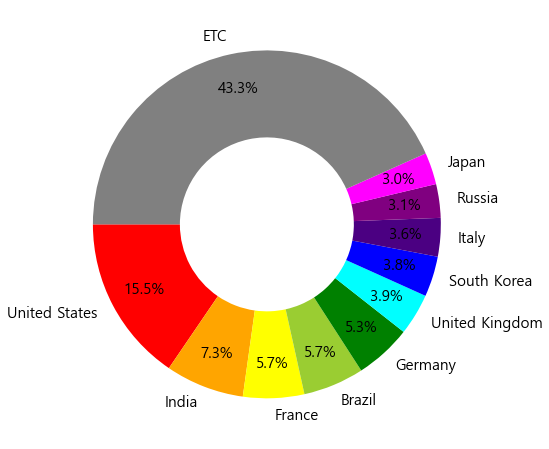

In [20]:
fig = plt.figure(figsize=(8,8))
values = df_top['확진자'].tolist()
labels = df_top['국가'].tolist()
colors = ['#ff0000', '#ffa500', '#ffff00', '#9acd32', '#008000',
          '#00ffff', '#0000ff', '#4b0082', '#800080', '#ff00ff', '#808080']
plt.pie(values, labels=labels, wedgeprops=dict(width=0.5),
        autopct = '%.1f%%', startangle=180, colors=colors, pctdistance = 0.8)
plt.show()